In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.backend as be

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from utils import *
from data import *
from layers import *
from models import *

In [4]:
limit_gpus()
set_gpu(1)

In [15]:
n_batch = 128

In [5]:
dataset = "cifar10"
ds_train, ds_test, ds_info = load_dataset(dataset, n_batch)

input_shape = ds_info.features['image'].shape
num_classes = ds_info.features['label'].num_classes

In [6]:
input_shape

(32, 32, 3)

In [7]:
model = Conv2DPhasorModel(input_shape, projection="dot", pooling="min", onehot_offset=0.0, 
                    onehot_phase=0.5,n_hidden=1000, dropout_rate=0.25)

In [8]:
(xs, ys) = next(iter(ds_train))

In [9]:
model(xs)

<tf.Tensor: shape=(128, 10), dtype=float32, numpy=
array([[ 0.7275418 , -0.49584907, -0.9958962 , ...,  0.85729975,
         0.5834086 ,  0.9742822 ],
       [ 0.04002258,  0.84788394, -0.160968  , ...,  0.7536397 ,
         0.30434152,  0.5536345 ],
       [ 0.32519826,  0.336706  , -0.6398421 , ...,  0.36506268,
        -0.00207903, -0.10128937],
       ...,
       [ 0.2799541 ,  0.43560645, -0.52164996, ..., -0.28374907,
         0.35258   , -0.21336694],
       [ 0.45515916, -0.49385917,  0.9879966 , ...,  0.9059449 ,
         0.32377493,  0.83734506],
       [ 0.63076997, -0.31477913,  0.90221834, ...,  0.44388682,
         0.8098948 ,  0.7304395 ]], dtype=float32)>

In [11]:
#construct the augmented data set

In [10]:
x_train, y_train = get_raw_dat(ds_train)

In [12]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

In [13]:
model.compile(optimizer="rmsprop")

In [14]:
#train for an equivalent of 180 epochs on the original test set

In [14]:
batches = int(180 * 50000 / n_batch)

In [15]:
batches

70312

In [16]:
#execute the training - takes ~1 hour on a RTX 2080Ti

In [16]:
loss = model.train_aug(datagen.flow(x_train, y_train, batch_size=n_batch), batches)

Training loss tf.Tensor(0.9122599, shape=(), dtype=float32)
Training loss tf.Tensor(0.25291654, shape=(), dtype=float32)
Training loss tf.Tensor(0.09169802, shape=(), dtype=float32)
Training loss tf.Tensor(0.14484839, shape=(), dtype=float32)
Training loss tf.Tensor(0.09283641, shape=(), dtype=float32)
Training loss tf.Tensor(0.09147115, shape=(), dtype=float32)
Training loss tf.Tensor(0.09253006, shape=(), dtype=float32)
Training loss tf.Tensor(0.09345731, shape=(), dtype=float32)
Training loss tf.Tensor(0.09061806, shape=(), dtype=float32)
Training loss tf.Tensor(0.08704358, shape=(), dtype=float32)
Training loss tf.Tensor(0.08481003, shape=(), dtype=float32)
Training loss tf.Tensor(0.08707219, shape=(), dtype=float32)
Training loss tf.Tensor(0.08996929, shape=(), dtype=float32)
Training loss tf.Tensor(0.08550146, shape=(), dtype=float32)
Training loss tf.Tensor(0.08617717, shape=(), dtype=float32)
Training loss tf.Tensor(0.08143597, shape=(), dtype=float32)
Training loss tf.Tensor(0

Training loss tf.Tensor(0.056715317, shape=(), dtype=float32)
Training loss tf.Tensor(0.06473682, shape=(), dtype=float32)
Training loss tf.Tensor(0.054599613, shape=(), dtype=float32)
Training loss tf.Tensor(0.058377527, shape=(), dtype=float32)
Training loss tf.Tensor(0.06553373, shape=(), dtype=float32)
Training loss tf.Tensor(0.057681624, shape=(), dtype=float32)
Training loss tf.Tensor(0.055550646, shape=(), dtype=float32)
Training loss tf.Tensor(0.05789365, shape=(), dtype=float32)
Training loss tf.Tensor(0.05687756, shape=(), dtype=float32)
Training loss tf.Tensor(0.053237133, shape=(), dtype=float32)
Training loss tf.Tensor(0.06124679, shape=(), dtype=float32)
Training loss tf.Tensor(0.061911546, shape=(), dtype=float32)
Training loss tf.Tensor(0.05762974, shape=(), dtype=float32)
Training loss tf.Tensor(0.06410144, shape=(), dtype=float32)
Training loss tf.Tensor(0.06039396, shape=(), dtype=float32)
Training loss tf.Tensor(0.068784684, shape=(), dtype=float32)
Training loss tf

Training loss tf.Tensor(0.048715234, shape=(), dtype=float32)
Training loss tf.Tensor(0.054029137, shape=(), dtype=float32)
Training loss tf.Tensor(0.051273406, shape=(), dtype=float32)
Training loss tf.Tensor(0.05208057, shape=(), dtype=float32)
Training loss tf.Tensor(0.056291174, shape=(), dtype=float32)
Training loss tf.Tensor(0.05323097, shape=(), dtype=float32)
Training loss tf.Tensor(0.05405343, shape=(), dtype=float32)
Training loss tf.Tensor(0.048437983, shape=(), dtype=float32)
Training loss tf.Tensor(0.0522689, shape=(), dtype=float32)
Training loss tf.Tensor(0.053523105, shape=(), dtype=float32)
Training loss tf.Tensor(0.05262071, shape=(), dtype=float32)
Training loss tf.Tensor(0.059631296, shape=(), dtype=float32)
Training loss tf.Tensor(0.05050935, shape=(), dtype=float32)
Training loss tf.Tensor(0.0554675, shape=(), dtype=float32)
Training loss tf.Tensor(0.055018973, shape=(), dtype=float32)
Training loss tf.Tensor(0.05121939, shape=(), dtype=float32)
Training loss tf.T

Training loss tf.Tensor(0.051262796, shape=(), dtype=float32)
Training loss tf.Tensor(0.050683275, shape=(), dtype=float32)
Training loss tf.Tensor(0.058985166, shape=(), dtype=float32)
Training loss tf.Tensor(0.047691397, shape=(), dtype=float32)
Training loss tf.Tensor(0.05074246, shape=(), dtype=float32)
Training loss tf.Tensor(0.04800924, shape=(), dtype=float32)
Training loss tf.Tensor(0.052622676, shape=(), dtype=float32)
Training loss tf.Tensor(0.045720782, shape=(), dtype=float32)
Training loss tf.Tensor(0.048646227, shape=(), dtype=float32)
Training loss tf.Tensor(0.055224106, shape=(), dtype=float32)
Training loss tf.Tensor(0.0556476, shape=(), dtype=float32)
Training loss tf.Tensor(0.047825478, shape=(), dtype=float32)
Training loss tf.Tensor(0.042153254, shape=(), dtype=float32)
Training loss tf.Tensor(0.052118413, shape=(), dtype=float32)
Training loss tf.Tensor(0.04905174, shape=(), dtype=float32)
Training loss tf.Tensor(0.042939946, shape=(), dtype=float32)
Training loss

Training loss tf.Tensor(0.049252536, shape=(), dtype=float32)
Training loss tf.Tensor(0.0437182, shape=(), dtype=float32)
Training loss tf.Tensor(0.052132558, shape=(), dtype=float32)
Training loss tf.Tensor(0.043807328, shape=(), dtype=float32)
Training loss tf.Tensor(0.050606683, shape=(), dtype=float32)
Training loss tf.Tensor(0.04706481, shape=(), dtype=float32)
Training loss tf.Tensor(0.052211113, shape=(), dtype=float32)
Training loss tf.Tensor(0.05729247, shape=(), dtype=float32)
Training loss tf.Tensor(0.044908278, shape=(), dtype=float32)
Training loss tf.Tensor(0.047266774, shape=(), dtype=float32)
Training loss tf.Tensor(0.042542867, shape=(), dtype=float32)
Training loss tf.Tensor(0.043901924, shape=(), dtype=float32)
Training loss tf.Tensor(0.040507615, shape=(), dtype=float32)
Training loss tf.Tensor(0.042614616, shape=(), dtype=float32)
Training loss tf.Tensor(0.056168407, shape=(), dtype=float32)
Training loss tf.Tensor(0.04189327, shape=(), dtype=float32)
Training loss

Training loss tf.Tensor(0.048091143, shape=(), dtype=float32)
Training loss tf.Tensor(0.045474257, shape=(), dtype=float32)
Training loss tf.Tensor(0.042984553, shape=(), dtype=float32)
Training loss tf.Tensor(0.04996254, shape=(), dtype=float32)
Training loss tf.Tensor(0.036707543, shape=(), dtype=float32)
Training loss tf.Tensor(0.04561472, shape=(), dtype=float32)
Training loss tf.Tensor(0.043754227, shape=(), dtype=float32)
Training loss tf.Tensor(0.042131636, shape=(), dtype=float32)
Training loss tf.Tensor(0.04929776, shape=(), dtype=float32)
Training loss tf.Tensor(0.04394491, shape=(), dtype=float32)
Training loss tf.Tensor(0.041745916, shape=(), dtype=float32)
Training loss tf.Tensor(0.038409755, shape=(), dtype=float32)
Training loss tf.Tensor(0.041747697, shape=(), dtype=float32)
Training loss tf.Tensor(0.042442285, shape=(), dtype=float32)
Training loss tf.Tensor(0.036668625, shape=(), dtype=float32)
Training loss tf.Tensor(0.04230264, shape=(), dtype=float32)
Training loss

In [59]:
test_acc0 = model.accuracy(ds_test, False)

In [60]:
train_acc0 = model.accuracy(ds_train, False)

In [ ]:
#calculate the training and test accuracies

In [61]:
test_acc0

(<tf.Tensor: shape=(), dtype=float64, numpy=0.7293>,)

In [62]:
train_acc0

(<tf.Tensor: shape=(), dtype=float64, numpy=0.78648>,)

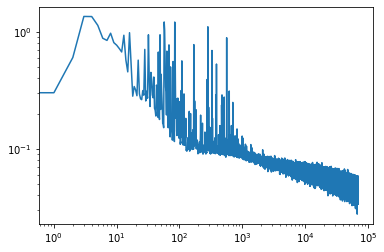

In [19]:
plt.loglog(loss)

In [ ]:
#if desired, run a batch of models to produce model statistics

In [16]:
runs = 7

In [17]:
def run_model(datagen, batches, pooling="min"):
    model = Conv2DPhasorModel(input_shape, projection="dot", pooling=pooling, onehot_offset=0.0, 
                    onehot_phase=0.5,n_hidden=1000, dropout_rate=0.20)
    
    model.compile(optimizer="rmsprop")
    loss = model.train_aug(datagen.flow(x_train, y_train, batch_size=128), batches)
    test_acc = model.accuracy(ds_test, False)
    train_acc = model.accuracy(ds_train, False)
    
    return loss, train_acc, test_acc

In [18]:
res = [run_model(datagen, batches, "min") for i in range(runs)]

Training loss tf.Tensor(1.036675, shape=(), dtype=float32)
Training loss tf.Tensor(0.20550987, shape=(), dtype=float32)
Training loss tf.Tensor(0.12240529, shape=(), dtype=float32)
Training loss tf.Tensor(0.09285319, shape=(), dtype=float32)
Training loss tf.Tensor(0.09652878, shape=(), dtype=float32)
Training loss tf.Tensor(0.09471726, shape=(), dtype=float32)
Training loss tf.Tensor(0.0997051, shape=(), dtype=float32)
Training loss tf.Tensor(0.08948967, shape=(), dtype=float32)
Training loss tf.Tensor(0.09426685, shape=(), dtype=float32)
Training loss tf.Tensor(0.0869458, shape=(), dtype=float32)
Training loss tf.Tensor(0.082470804, shape=(), dtype=float32)
Training loss tf.Tensor(0.08587596, shape=(), dtype=float32)
Training loss tf.Tensor(0.08734444, shape=(), dtype=float32)
Training loss tf.Tensor(0.087695815, shape=(), dtype=float32)
Training loss tf.Tensor(0.084701106, shape=(), dtype=float32)
Training loss tf.Tensor(0.083557434, shape=(), dtype=float32)
Training loss tf.Tensor(

Training loss tf.Tensor(0.06551735, shape=(), dtype=float32)
Training loss tf.Tensor(0.06314405, shape=(), dtype=float32)
Training loss tf.Tensor(0.058250315, shape=(), dtype=float32)
Training loss tf.Tensor(0.060789924, shape=(), dtype=float32)
Training loss tf.Tensor(0.057271473, shape=(), dtype=float32)
Training loss tf.Tensor(0.061101906, shape=(), dtype=float32)
Training loss tf.Tensor(0.059290685, shape=(), dtype=float32)
Training loss tf.Tensor(0.062296774, shape=(), dtype=float32)
Training loss tf.Tensor(0.059831448, shape=(), dtype=float32)
Training loss tf.Tensor(0.061547294, shape=(), dtype=float32)
Training loss tf.Tensor(0.06070658, shape=(), dtype=float32)
Training loss tf.Tensor(0.05996303, shape=(), dtype=float32)
Training loss tf.Tensor(0.062729046, shape=(), dtype=float32)
Training loss tf.Tensor(0.06254852, shape=(), dtype=float32)
Training loss tf.Tensor(0.06816579, shape=(), dtype=float32)
Training loss tf.Tensor(0.060816936, shape=(), dtype=float32)
Training loss 

Training loss tf.Tensor(0.054516234, shape=(), dtype=float32)
Training loss tf.Tensor(0.056501262, shape=(), dtype=float32)
Training loss tf.Tensor(0.061089665, shape=(), dtype=float32)
Training loss tf.Tensor(0.05478267, shape=(), dtype=float32)
Training loss tf.Tensor(0.061919704, shape=(), dtype=float32)
Training loss tf.Tensor(0.056827795, shape=(), dtype=float32)
Training loss tf.Tensor(0.055472188, shape=(), dtype=float32)
Training loss tf.Tensor(0.05501018, shape=(), dtype=float32)
Training loss tf.Tensor(0.04618849, shape=(), dtype=float32)
Training loss tf.Tensor(0.053412944, shape=(), dtype=float32)
Training loss tf.Tensor(0.061107554, shape=(), dtype=float32)
Training loss tf.Tensor(0.055591725, shape=(), dtype=float32)
Training loss tf.Tensor(0.059560373, shape=(), dtype=float32)
Training loss tf.Tensor(0.058352444, shape=(), dtype=float32)
Training loss tf.Tensor(0.048368506, shape=(), dtype=float32)
Training loss tf.Tensor(0.056261327, shape=(), dtype=float32)
Training lo

Training loss tf.Tensor(0.0498548, shape=(), dtype=float32)
Training loss tf.Tensor(0.056006778, shape=(), dtype=float32)
Training loss tf.Tensor(0.051518377, shape=(), dtype=float32)
Training loss tf.Tensor(0.059440304, shape=(), dtype=float32)
Training loss tf.Tensor(0.055913873, shape=(), dtype=float32)
Training loss tf.Tensor(0.053699505, shape=(), dtype=float32)
Training loss tf.Tensor(0.05313003, shape=(), dtype=float32)
Training loss tf.Tensor(0.054849155, shape=(), dtype=float32)
Training loss tf.Tensor(0.05044336, shape=(), dtype=float32)
Training loss tf.Tensor(0.05291907, shape=(), dtype=float32)
Training loss tf.Tensor(0.056560587, shape=(), dtype=float32)
Training loss tf.Tensor(0.05174212, shape=(), dtype=float32)
Training loss tf.Tensor(0.05424895, shape=(), dtype=float32)
Training loss tf.Tensor(0.045596965, shape=(), dtype=float32)
Training loss tf.Tensor(0.04594197, shape=(), dtype=float32)
Training loss tf.Tensor(0.051343545, shape=(), dtype=float32)
Training loss tf

Training loss tf.Tensor(0.045300305, shape=(), dtype=float32)
Training loss tf.Tensor(0.04781438, shape=(), dtype=float32)
Training loss tf.Tensor(0.046546035, shape=(), dtype=float32)
Training loss tf.Tensor(0.05614724, shape=(), dtype=float32)
Training loss tf.Tensor(0.052923016, shape=(), dtype=float32)
Training loss tf.Tensor(0.048013672, shape=(), dtype=float32)
Training loss tf.Tensor(0.0428506, shape=(), dtype=float32)
Training loss tf.Tensor(0.049503773, shape=(), dtype=float32)
Training loss tf.Tensor(0.04472686, shape=(), dtype=float32)
Training loss tf.Tensor(0.042360164, shape=(), dtype=float32)
Training loss tf.Tensor(0.045781437, shape=(), dtype=float32)
Training loss tf.Tensor(0.04758019, shape=(), dtype=float32)
Training loss tf.Tensor(0.05055184, shape=(), dtype=float32)
Training loss tf.Tensor(0.041790947, shape=(), dtype=float32)
Training loss tf.Tensor(0.04263396, shape=(), dtype=float32)
Training loss tf.Tensor(0.045875974, shape=(), dtype=float32)
Training loss tf

Training loss tf.Tensor(0.05253196, shape=(), dtype=float32)
Training loss tf.Tensor(0.04683029, shape=(), dtype=float32)
Training loss tf.Tensor(0.04287813, shape=(), dtype=float32)
Training loss tf.Tensor(0.04642175, shape=(), dtype=float32)
Training loss tf.Tensor(0.041649655, shape=(), dtype=float32)
Training loss tf.Tensor(0.05108721, shape=(), dtype=float32)
Training loss tf.Tensor(0.051573, shape=(), dtype=float32)
Training loss tf.Tensor(0.04853375, shape=(), dtype=float32)
Training loss tf.Tensor(0.04687144, shape=(), dtype=float32)
Training loss tf.Tensor(0.040640168, shape=(), dtype=float32)
Training loss tf.Tensor(0.045583002, shape=(), dtype=float32)
Training loss tf.Tensor(0.051449284, shape=(), dtype=float32)
Training loss tf.Tensor(0.043624856, shape=(), dtype=float32)
Training loss tf.Tensor(0.04238601, shape=(), dtype=float32)
Training loss tf.Tensor(0.052337505, shape=(), dtype=float32)
Training loss tf.Tensor(0.04570227, shape=(), dtype=float32)
Training loss tf.Ten

Training loss tf.Tensor(0.06724708, shape=(), dtype=float32)
Training loss tf.Tensor(0.06714912, shape=(), dtype=float32)
Training loss tf.Tensor(0.067632906, shape=(), dtype=float32)
Training loss tf.Tensor(0.0677129, shape=(), dtype=float32)
Training loss tf.Tensor(0.05909738, shape=(), dtype=float32)
Training loss tf.Tensor(0.062490046, shape=(), dtype=float32)
Training loss tf.Tensor(0.062847905, shape=(), dtype=float32)
Training loss tf.Tensor(0.06617507, shape=(), dtype=float32)
Training loss tf.Tensor(0.047445077, shape=(), dtype=float32)
Training loss tf.Tensor(0.061828878, shape=(), dtype=float32)
Training loss tf.Tensor(0.059610613, shape=(), dtype=float32)
Training loss tf.Tensor(0.0621612, shape=(), dtype=float32)
Training loss tf.Tensor(0.06884266, shape=(), dtype=float32)
Training loss tf.Tensor(0.055857558, shape=(), dtype=float32)
Training loss tf.Tensor(0.061914995, shape=(), dtype=float32)
Training loss tf.Tensor(0.064484514, shape=(), dtype=float32)
Training loss tf.

Training loss tf.Tensor(0.056361444, shape=(), dtype=float32)
Training loss tf.Tensor(0.05562431, shape=(), dtype=float32)
Training loss tf.Tensor(0.04899711, shape=(), dtype=float32)
Training loss tf.Tensor(0.05364588, shape=(), dtype=float32)
Training loss tf.Tensor(0.05186303, shape=(), dtype=float32)
Training loss tf.Tensor(0.06330205, shape=(), dtype=float32)
Training loss tf.Tensor(0.052147124, shape=(), dtype=float32)
Training loss tf.Tensor(0.061410952, shape=(), dtype=float32)
Training loss tf.Tensor(0.060729753, shape=(), dtype=float32)
Training loss tf.Tensor(0.054140173, shape=(), dtype=float32)
Training loss tf.Tensor(0.056224998, shape=(), dtype=float32)
Training loss tf.Tensor(0.056938186, shape=(), dtype=float32)
Training loss tf.Tensor(0.05078222, shape=(), dtype=float32)
Training loss tf.Tensor(0.053095937, shape=(), dtype=float32)
Training loss tf.Tensor(0.049525365, shape=(), dtype=float32)
Training loss tf.Tensor(0.053406317, shape=(), dtype=float32)
Training loss 

Training loss tf.Tensor(0.062169623, shape=(), dtype=float32)
Training loss tf.Tensor(0.05247917, shape=(), dtype=float32)
Training loss tf.Tensor(0.050432578, shape=(), dtype=float32)
Training loss tf.Tensor(0.04567167, shape=(), dtype=float32)
Training loss tf.Tensor(0.054901697, shape=(), dtype=float32)
Training loss tf.Tensor(0.05239009, shape=(), dtype=float32)
Training loss tf.Tensor(0.048376553, shape=(), dtype=float32)
Training loss tf.Tensor(0.048213072, shape=(), dtype=float32)
Training loss tf.Tensor(0.05417528, shape=(), dtype=float32)
Training loss tf.Tensor(0.054019935, shape=(), dtype=float32)
Training loss tf.Tensor(0.050183922, shape=(), dtype=float32)
Training loss tf.Tensor(0.05499091, shape=(), dtype=float32)
Training loss tf.Tensor(0.057811923, shape=(), dtype=float32)
Training loss tf.Tensor(0.053000674, shape=(), dtype=float32)
Training loss tf.Tensor(0.051121477, shape=(), dtype=float32)
Training loss tf.Tensor(0.04792913, shape=(), dtype=float32)
Training loss 

Training loss tf.Tensor(0.051336534, shape=(), dtype=float32)
Training loss tf.Tensor(0.054977324, shape=(), dtype=float32)
Training loss tf.Tensor(0.04300127, shape=(), dtype=float32)
Training loss tf.Tensor(0.04363382, shape=(), dtype=float32)
Training loss tf.Tensor(0.04334869, shape=(), dtype=float32)
Training loss tf.Tensor(0.049422983, shape=(), dtype=float32)
Training loss tf.Tensor(0.049570747, shape=(), dtype=float32)
Training loss tf.Tensor(0.05500094, shape=(), dtype=float32)
Training loss tf.Tensor(0.0528249, shape=(), dtype=float32)
Training loss tf.Tensor(0.05367515, shape=(), dtype=float32)
Training loss tf.Tensor(0.05337979, shape=(), dtype=float32)
Training loss tf.Tensor(0.054211713, shape=(), dtype=float32)
Training loss tf.Tensor(0.045207854, shape=(), dtype=float32)
Training loss tf.Tensor(0.049994603, shape=(), dtype=float32)
Training loss tf.Tensor(0.049463086, shape=(), dtype=float32)
Training loss tf.Tensor(0.0546935, shape=(), dtype=float32)
Training loss tf.T

Training loss tf.Tensor(0.047755525, shape=(), dtype=float32)
Training loss tf.Tensor(0.04761696, shape=(), dtype=float32)
Training loss tf.Tensor(0.045722857, shape=(), dtype=float32)
Training loss tf.Tensor(0.050737105, shape=(), dtype=float32)
Training loss tf.Tensor(0.044040777, shape=(), dtype=float32)
Training loss tf.Tensor(0.04590235, shape=(), dtype=float32)
Training loss tf.Tensor(0.042986616, shape=(), dtype=float32)
Training loss tf.Tensor(0.048324537, shape=(), dtype=float32)
Training loss tf.Tensor(0.05003597, shape=(), dtype=float32)
Training loss tf.Tensor(0.04353136, shape=(), dtype=float32)
Training loss tf.Tensor(0.04549422, shape=(), dtype=float32)
Training loss tf.Tensor(0.051042855, shape=(), dtype=float32)
Training loss tf.Tensor(0.04761222, shape=(), dtype=float32)
Training loss tf.Tensor(0.0426945, shape=(), dtype=float32)
Training loss tf.Tensor(0.044043083, shape=(), dtype=float32)
Training loss tf.Tensor(0.042615082, shape=(), dtype=float32)
Training loss tf

Training loss tf.Tensor(0.07132609, shape=(), dtype=float32)
Training loss tf.Tensor(0.06748292, shape=(), dtype=float32)
Training loss tf.Tensor(0.07101199, shape=(), dtype=float32)
Training loss tf.Tensor(0.06930466, shape=(), dtype=float32)
Training loss tf.Tensor(0.0724748, shape=(), dtype=float32)
Training loss tf.Tensor(0.06833881, shape=(), dtype=float32)
Training loss tf.Tensor(0.06973336, shape=(), dtype=float32)
Training loss tf.Tensor(0.06813073, shape=(), dtype=float32)
Training loss tf.Tensor(0.06910756, shape=(), dtype=float32)
Training loss tf.Tensor(0.06520241, shape=(), dtype=float32)
Training loss tf.Tensor(0.06776601, shape=(), dtype=float32)
Training loss tf.Tensor(0.06897465, shape=(), dtype=float32)
Training loss tf.Tensor(0.06778955, shape=(), dtype=float32)
Training loss tf.Tensor(0.071924135, shape=(), dtype=float32)
Training loss tf.Tensor(0.06254512, shape=(), dtype=float32)
Training loss tf.Tensor(0.062379684, shape=(), dtype=float32)
Training loss tf.Tensor

Training loss tf.Tensor(0.05243752, shape=(), dtype=float32)
Training loss tf.Tensor(0.06291811, shape=(), dtype=float32)
Training loss tf.Tensor(0.072083354, shape=(), dtype=float32)
Training loss tf.Tensor(0.06350326, shape=(), dtype=float32)
Training loss tf.Tensor(0.059683837, shape=(), dtype=float32)
Training loss tf.Tensor(0.0674218, shape=(), dtype=float32)
Training loss tf.Tensor(0.059422668, shape=(), dtype=float32)
Training loss tf.Tensor(0.051664505, shape=(), dtype=float32)
Training loss tf.Tensor(0.060282998, shape=(), dtype=float32)
Training loss tf.Tensor(0.05632197, shape=(), dtype=float32)
Training loss tf.Tensor(0.05503179, shape=(), dtype=float32)
Training loss tf.Tensor(0.05904886, shape=(), dtype=float32)
Training loss tf.Tensor(0.055978026, shape=(), dtype=float32)
Training loss tf.Tensor(0.060291193, shape=(), dtype=float32)
Training loss tf.Tensor(0.058405723, shape=(), dtype=float32)
Training loss tf.Tensor(0.058608953, shape=(), dtype=float32)
Training loss tf

Training loss tf.Tensor(0.052521795, shape=(), dtype=float32)
Training loss tf.Tensor(0.051667448, shape=(), dtype=float32)
Training loss tf.Tensor(0.058419876, shape=(), dtype=float32)
Training loss tf.Tensor(0.04936209, shape=(), dtype=float32)
Training loss tf.Tensor(0.051875584, shape=(), dtype=float32)
Training loss tf.Tensor(0.05567065, shape=(), dtype=float32)
Training loss tf.Tensor(0.055022843, shape=(), dtype=float32)
Training loss tf.Tensor(0.059383996, shape=(), dtype=float32)
Training loss tf.Tensor(0.05201274, shape=(), dtype=float32)
Training loss tf.Tensor(0.053760983, shape=(), dtype=float32)
Training loss tf.Tensor(0.057268716, shape=(), dtype=float32)
Training loss tf.Tensor(0.05255594, shape=(), dtype=float32)
Training loss tf.Tensor(0.04713027, shape=(), dtype=float32)
Training loss tf.Tensor(0.06486537, shape=(), dtype=float32)
Training loss tf.Tensor(0.059475895, shape=(), dtype=float32)
Training loss tf.Tensor(0.052433386, shape=(), dtype=float32)
Training loss 

Training loss tf.Tensor(0.04384717, shape=(), dtype=float32)
Training loss tf.Tensor(0.046293385, shape=(), dtype=float32)
Training loss tf.Tensor(0.050156116, shape=(), dtype=float32)
Training loss tf.Tensor(0.048454173, shape=(), dtype=float32)
Training loss tf.Tensor(0.049428537, shape=(), dtype=float32)
Training loss tf.Tensor(0.04694806, shape=(), dtype=float32)
Training loss tf.Tensor(0.057382036, shape=(), dtype=float32)
Training loss tf.Tensor(0.059580944, shape=(), dtype=float32)
Training loss tf.Tensor(0.053441703, shape=(), dtype=float32)
Training loss tf.Tensor(0.04362421, shape=(), dtype=float32)
Training loss tf.Tensor(0.049001534, shape=(), dtype=float32)
Training loss tf.Tensor(0.050908, shape=(), dtype=float32)
Training loss tf.Tensor(0.046968892, shape=(), dtype=float32)
Training loss tf.Tensor(0.051187396, shape=(), dtype=float32)
Training loss tf.Tensor(0.050906643, shape=(), dtype=float32)
Training loss tf.Tensor(0.049278125, shape=(), dtype=float32)
Training loss 

Training loss tf.Tensor(0.046791725, shape=(), dtype=float32)
Training loss tf.Tensor(0.054401807, shape=(), dtype=float32)
Training loss tf.Tensor(0.052274577, shape=(), dtype=float32)
Training loss tf.Tensor(0.049893796, shape=(), dtype=float32)
Training loss tf.Tensor(0.05251283, shape=(), dtype=float32)
Training loss tf.Tensor(0.046833895, shape=(), dtype=float32)
Training loss tf.Tensor(0.047004655, shape=(), dtype=float32)
Training loss tf.Tensor(0.045803417, shape=(), dtype=float32)
Training loss tf.Tensor(0.046642907, shape=(), dtype=float32)
Training loss tf.Tensor(0.04872515, shape=(), dtype=float32)
Training loss tf.Tensor(0.043382857, shape=(), dtype=float32)
Training loss tf.Tensor(0.04574816, shape=(), dtype=float32)
Training loss tf.Tensor(0.05070772, shape=(), dtype=float32)
Training loss tf.Tensor(0.043536115, shape=(), dtype=float32)
Training loss tf.Tensor(0.049271885, shape=(), dtype=float32)
Training loss tf.Tensor(0.04735458, shape=(), dtype=float32)
Training loss

Training loss tf.Tensor(0.076750115, shape=(), dtype=float32)
Training loss tf.Tensor(0.07258326, shape=(), dtype=float32)
Training loss tf.Tensor(0.07041425, shape=(), dtype=float32)
Training loss tf.Tensor(0.06953238, shape=(), dtype=float32)
Training loss tf.Tensor(0.07191745, shape=(), dtype=float32)
Training loss tf.Tensor(0.0747837, shape=(), dtype=float32)
Training loss tf.Tensor(0.07419175, shape=(), dtype=float32)
Training loss tf.Tensor(0.07225981, shape=(), dtype=float32)
Training loss tf.Tensor(0.08145447, shape=(), dtype=float32)
Training loss tf.Tensor(0.07107252, shape=(), dtype=float32)
Training loss tf.Tensor(0.07162451, shape=(), dtype=float32)
Training loss tf.Tensor(0.077659816, shape=(), dtype=float32)
Training loss tf.Tensor(0.07573909, shape=(), dtype=float32)
Training loss tf.Tensor(0.0690113, shape=(), dtype=float32)
Training loss tf.Tensor(0.07263828, shape=(), dtype=float32)
Training loss tf.Tensor(0.072392434, shape=(), dtype=float32)
Training loss tf.Tensor

Training loss tf.Tensor(0.058670945, shape=(), dtype=float32)
Training loss tf.Tensor(0.06365913, shape=(), dtype=float32)
Training loss tf.Tensor(0.063139156, shape=(), dtype=float32)
Training loss tf.Tensor(0.056310598, shape=(), dtype=float32)
Training loss tf.Tensor(0.06453753, shape=(), dtype=float32)
Training loss tf.Tensor(0.058818147, shape=(), dtype=float32)
Training loss tf.Tensor(0.059299152, shape=(), dtype=float32)
Training loss tf.Tensor(0.05864311, shape=(), dtype=float32)
Training loss tf.Tensor(0.06319059, shape=(), dtype=float32)
Training loss tf.Tensor(0.063228734, shape=(), dtype=float32)
Training loss tf.Tensor(0.05877927, shape=(), dtype=float32)
Training loss tf.Tensor(0.06296781, shape=(), dtype=float32)
Training loss tf.Tensor(0.060842343, shape=(), dtype=float32)
Training loss tf.Tensor(0.05608984, shape=(), dtype=float32)
Training loss tf.Tensor(0.066698894, shape=(), dtype=float32)
Training loss tf.Tensor(0.0639436, shape=(), dtype=float32)
Training loss tf.

Training loss tf.Tensor(0.051168796, shape=(), dtype=float32)
Training loss tf.Tensor(0.051779546, shape=(), dtype=float32)
Training loss tf.Tensor(0.06199151, shape=(), dtype=float32)
Training loss tf.Tensor(0.056552738, shape=(), dtype=float32)
Training loss tf.Tensor(0.055914134, shape=(), dtype=float32)
Training loss tf.Tensor(0.051522896, shape=(), dtype=float32)
Training loss tf.Tensor(0.056727055, shape=(), dtype=float32)
Training loss tf.Tensor(0.052459344, shape=(), dtype=float32)
Training loss tf.Tensor(0.05703693, shape=(), dtype=float32)
Training loss tf.Tensor(0.0591949, shape=(), dtype=float32)
Training loss tf.Tensor(0.060236868, shape=(), dtype=float32)
Training loss tf.Tensor(0.05940379, shape=(), dtype=float32)
Training loss tf.Tensor(0.05096043, shape=(), dtype=float32)
Training loss tf.Tensor(0.059814952, shape=(), dtype=float32)
Training loss tf.Tensor(0.05518777, shape=(), dtype=float32)
Training loss tf.Tensor(0.057970915, shape=(), dtype=float32)
Training loss t

Training loss tf.Tensor(0.058855083, shape=(), dtype=float32)
Training loss tf.Tensor(0.054625686, shape=(), dtype=float32)
Training loss tf.Tensor(0.048224263, shape=(), dtype=float32)
Training loss tf.Tensor(0.059551015, shape=(), dtype=float32)
Training loss tf.Tensor(0.05804976, shape=(), dtype=float32)
Training loss tf.Tensor(0.053188488, shape=(), dtype=float32)
Training loss tf.Tensor(0.054957714, shape=(), dtype=float32)
Training loss tf.Tensor(0.04884949, shape=(), dtype=float32)
Training loss tf.Tensor(0.049874708, shape=(), dtype=float32)
Training loss tf.Tensor(0.055637524, shape=(), dtype=float32)
Training loss tf.Tensor(0.053754464, shape=(), dtype=float32)
Training loss tf.Tensor(0.053800445, shape=(), dtype=float32)
Training loss tf.Tensor(0.054837935, shape=(), dtype=float32)
Training loss tf.Tensor(0.05167672, shape=(), dtype=float32)
Training loss tf.Tensor(0.052353904, shape=(), dtype=float32)
Training loss tf.Tensor(0.051219046, shape=(), dtype=float32)
Training lo

Training loss tf.Tensor(0.048958313, shape=(), dtype=float32)
Training loss tf.Tensor(0.046328276, shape=(), dtype=float32)
Training loss tf.Tensor(0.049075924, shape=(), dtype=float32)
Training loss tf.Tensor(0.04919656, shape=(), dtype=float32)
Training loss tf.Tensor(0.05032794, shape=(), dtype=float32)
Training loss tf.Tensor(0.055806708, shape=(), dtype=float32)
Training loss tf.Tensor(0.05189284, shape=(), dtype=float32)
Training loss tf.Tensor(0.05802328, shape=(), dtype=float32)
Training loss tf.Tensor(0.050442412, shape=(), dtype=float32)
Training loss tf.Tensor(0.046400018, shape=(), dtype=float32)
Training loss tf.Tensor(0.04848835, shape=(), dtype=float32)
Training loss tf.Tensor(0.050768644, shape=(), dtype=float32)
Training loss tf.Tensor(0.056971166, shape=(), dtype=float32)
Training loss tf.Tensor(0.05492163, shape=(), dtype=float32)
Training loss tf.Tensor(0.055324264, shape=(), dtype=float32)
Training loss tf.Tensor(0.041714363, shape=(), dtype=float32)
Training loss 

Training loss tf.Tensor(0.051207863, shape=(), dtype=float32)
Training loss tf.Tensor(0.04515385, shape=(), dtype=float32)
Training loss tf.Tensor(0.04270827, shape=(), dtype=float32)
Training loss tf.Tensor(0.04410278, shape=(), dtype=float32)
Training loss tf.Tensor(0.046145447, shape=(), dtype=float32)
Training loss tf.Tensor(1.0166824, shape=(), dtype=float32)
Training loss tf.Tensor(0.13954003, shape=(), dtype=float32)
Training loss tf.Tensor(0.09203807, shape=(), dtype=float32)
Training loss tf.Tensor(0.098539084, shape=(), dtype=float32)
Training loss tf.Tensor(0.09293458, shape=(), dtype=float32)
Training loss tf.Tensor(0.0928622, shape=(), dtype=float32)
Training loss tf.Tensor(0.104943395, shape=(), dtype=float32)
Training loss tf.Tensor(0.089730084, shape=(), dtype=float32)
Training loss tf.Tensor(0.089548945, shape=(), dtype=float32)
Training loss tf.Tensor(0.09045383, shape=(), dtype=float32)
Training loss tf.Tensor(0.08300057, shape=(), dtype=float32)
Training loss tf.Ten

Training loss tf.Tensor(0.06214848, shape=(), dtype=float32)
Training loss tf.Tensor(0.05735266, shape=(), dtype=float32)
Training loss tf.Tensor(0.062436137, shape=(), dtype=float32)
Training loss tf.Tensor(0.06399974, shape=(), dtype=float32)
Training loss tf.Tensor(0.061319653, shape=(), dtype=float32)
Training loss tf.Tensor(0.06835582, shape=(), dtype=float32)
Training loss tf.Tensor(0.06671189, shape=(), dtype=float32)
Training loss tf.Tensor(0.0679233, shape=(), dtype=float32)
Training loss tf.Tensor(0.054802567, shape=(), dtype=float32)
Training loss tf.Tensor(0.05653558, shape=(), dtype=float32)
Training loss tf.Tensor(0.054977626, shape=(), dtype=float32)
Training loss tf.Tensor(0.065547556, shape=(), dtype=float32)
Training loss tf.Tensor(0.057355434, shape=(), dtype=float32)
Training loss tf.Tensor(0.064820744, shape=(), dtype=float32)
Training loss tf.Tensor(0.062886596, shape=(), dtype=float32)
Training loss tf.Tensor(0.056691512, shape=(), dtype=float32)
Training loss tf

Training loss tf.Tensor(0.05494804, shape=(), dtype=float32)
Training loss tf.Tensor(0.056303788, shape=(), dtype=float32)
Training loss tf.Tensor(0.05350019, shape=(), dtype=float32)
Training loss tf.Tensor(0.04872684, shape=(), dtype=float32)
Training loss tf.Tensor(0.05444015, shape=(), dtype=float32)
Training loss tf.Tensor(0.055656333, shape=(), dtype=float32)
Training loss tf.Tensor(0.05393344, shape=(), dtype=float32)
Training loss tf.Tensor(0.04806407, shape=(), dtype=float32)
Training loss tf.Tensor(0.056962438, shape=(), dtype=float32)
Training loss tf.Tensor(0.056950733, shape=(), dtype=float32)
Training loss tf.Tensor(0.051480874, shape=(), dtype=float32)
Training loss tf.Tensor(0.05976571, shape=(), dtype=float32)
Training loss tf.Tensor(0.056737963, shape=(), dtype=float32)
Training loss tf.Tensor(0.057185736, shape=(), dtype=float32)
Training loss tf.Tensor(0.055707365, shape=(), dtype=float32)
Training loss tf.Tensor(0.06045582, shape=(), dtype=float32)
Training loss tf

Training loss tf.Tensor(0.047528546, shape=(), dtype=float32)
Training loss tf.Tensor(0.050382018, shape=(), dtype=float32)
Training loss tf.Tensor(0.05192016, shape=(), dtype=float32)
Training loss tf.Tensor(0.052043177, shape=(), dtype=float32)
Training loss tf.Tensor(0.047904145, shape=(), dtype=float32)
Training loss tf.Tensor(0.05155189, shape=(), dtype=float32)
Training loss tf.Tensor(0.056521654, shape=(), dtype=float32)
Training loss tf.Tensor(0.05004123, shape=(), dtype=float32)
Training loss tf.Tensor(0.0602817, shape=(), dtype=float32)
Training loss tf.Tensor(0.05705583, shape=(), dtype=float32)
Training loss tf.Tensor(0.049988143, shape=(), dtype=float32)
Training loss tf.Tensor(0.051205494, shape=(), dtype=float32)
Training loss tf.Tensor(0.04988475, shape=(), dtype=float32)
Training loss tf.Tensor(0.051661976, shape=(), dtype=float32)
Training loss tf.Tensor(0.04662664, shape=(), dtype=float32)
Training loss tf.Tensor(0.049510553, shape=(), dtype=float32)
Training loss tf

Training loss tf.Tensor(0.048673257, shape=(), dtype=float32)
Training loss tf.Tensor(0.050647423, shape=(), dtype=float32)
Training loss tf.Tensor(0.047630955, shape=(), dtype=float32)
Training loss tf.Tensor(0.054339185, shape=(), dtype=float32)
Training loss tf.Tensor(0.050662626, shape=(), dtype=float32)
Training loss tf.Tensor(0.048171166, shape=(), dtype=float32)
Training loss tf.Tensor(0.053620815, shape=(), dtype=float32)
Training loss tf.Tensor(0.049116593, shape=(), dtype=float32)
Training loss tf.Tensor(0.051159415, shape=(), dtype=float32)
Training loss tf.Tensor(0.05010897, shape=(), dtype=float32)
Training loss tf.Tensor(0.053869653, shape=(), dtype=float32)
Training loss tf.Tensor(0.05637774, shape=(), dtype=float32)
Training loss tf.Tensor(0.045819044, shape=(), dtype=float32)
Training loss tf.Tensor(0.05487773, shape=(), dtype=float32)
Training loss tf.Tensor(0.048340447, shape=(), dtype=float32)
Training loss tf.Tensor(0.050611027, shape=(), dtype=float32)
Training lo

Training loss tf.Tensor(0.04818229, shape=(), dtype=float32)
Training loss tf.Tensor(0.03831807, shape=(), dtype=float32)
Training loss tf.Tensor(0.037542626, shape=(), dtype=float32)
Training loss tf.Tensor(0.047971036, shape=(), dtype=float32)
Training loss tf.Tensor(0.04331535, shape=(), dtype=float32)
Training loss tf.Tensor(0.037683677, shape=(), dtype=float32)
Training loss tf.Tensor(0.04045151, shape=(), dtype=float32)
Training loss tf.Tensor(0.042887606, shape=(), dtype=float32)
Training loss tf.Tensor(0.043759957, shape=(), dtype=float32)
Training loss tf.Tensor(0.044779558, shape=(), dtype=float32)
Training loss tf.Tensor(0.045305956, shape=(), dtype=float32)
Training loss tf.Tensor(0.056567892, shape=(), dtype=float32)
Training loss tf.Tensor(0.04394237, shape=(), dtype=float32)
Training loss tf.Tensor(0.05548405, shape=(), dtype=float32)
Training loss tf.Tensor(0.04839533, shape=(), dtype=float32)
Training loss tf.Tensor(0.04919534, shape=(), dtype=float32)
Training loss tf

Training loss tf.Tensor(0.060303442, shape=(), dtype=float32)
Training loss tf.Tensor(0.061082263, shape=(), dtype=float32)
Training loss tf.Tensor(0.0645151, shape=(), dtype=float32)
Training loss tf.Tensor(0.06540424, shape=(), dtype=float32)
Training loss tf.Tensor(0.07427063, shape=(), dtype=float32)
Training loss tf.Tensor(0.06880662, shape=(), dtype=float32)
Training loss tf.Tensor(0.06659373, shape=(), dtype=float32)
Training loss tf.Tensor(0.06518906, shape=(), dtype=float32)
Training loss tf.Tensor(0.063941166, shape=(), dtype=float32)
Training loss tf.Tensor(0.07157219, shape=(), dtype=float32)
Training loss tf.Tensor(0.0646859, shape=(), dtype=float32)
Training loss tf.Tensor(0.0657534, shape=(), dtype=float32)
Training loss tf.Tensor(0.06028109, shape=(), dtype=float32)
Training loss tf.Tensor(0.065299354, shape=(), dtype=float32)
Training loss tf.Tensor(0.06656651, shape=(), dtype=float32)
Training loss tf.Tensor(0.060965173, shape=(), dtype=float32)
Training loss tf.Tenso

Training loss tf.Tensor(0.06628626, shape=(), dtype=float32)
Training loss tf.Tensor(0.05783218, shape=(), dtype=float32)
Training loss tf.Tensor(0.069713116, shape=(), dtype=float32)
Training loss tf.Tensor(0.056839988, shape=(), dtype=float32)
Training loss tf.Tensor(0.059971385, shape=(), dtype=float32)
Training loss tf.Tensor(0.05248112, shape=(), dtype=float32)
Training loss tf.Tensor(0.05281215, shape=(), dtype=float32)
Training loss tf.Tensor(0.06562901, shape=(), dtype=float32)
Training loss tf.Tensor(0.052810088, shape=(), dtype=float32)
Training loss tf.Tensor(0.05913819, shape=(), dtype=float32)
Training loss tf.Tensor(0.06405346, shape=(), dtype=float32)
Training loss tf.Tensor(0.05541496, shape=(), dtype=float32)
Training loss tf.Tensor(0.061135523, shape=(), dtype=float32)
Training loss tf.Tensor(0.056608036, shape=(), dtype=float32)
Training loss tf.Tensor(0.06399252, shape=(), dtype=float32)
Training loss tf.Tensor(0.058225602, shape=(), dtype=float32)
Training loss tf.

Training loss tf.Tensor(0.0563318, shape=(), dtype=float32)
Training loss tf.Tensor(0.055743508, shape=(), dtype=float32)
Training loss tf.Tensor(0.054245558, shape=(), dtype=float32)
Training loss tf.Tensor(0.05035023, shape=(), dtype=float32)
Training loss tf.Tensor(0.053107787, shape=(), dtype=float32)
Training loss tf.Tensor(0.045650642, shape=(), dtype=float32)
Training loss tf.Tensor(0.051134095, shape=(), dtype=float32)
Training loss tf.Tensor(0.053051785, shape=(), dtype=float32)
Training loss tf.Tensor(0.05607961, shape=(), dtype=float32)
Training loss tf.Tensor(0.053333342, shape=(), dtype=float32)
Training loss tf.Tensor(0.050442964, shape=(), dtype=float32)
Training loss tf.Tensor(0.053206816, shape=(), dtype=float32)
Training loss tf.Tensor(0.0496084, shape=(), dtype=float32)
Training loss tf.Tensor(0.048500374, shape=(), dtype=float32)
Training loss tf.Tensor(0.049716316, shape=(), dtype=float32)
Training loss tf.Tensor(0.046260584, shape=(), dtype=float32)
Training loss 

Training loss tf.Tensor(0.05913043, shape=(), dtype=float32)
Training loss tf.Tensor(0.04697291, shape=(), dtype=float32)
Training loss tf.Tensor(0.0507951, shape=(), dtype=float32)
Training loss tf.Tensor(0.05309353, shape=(), dtype=float32)
Training loss tf.Tensor(0.048290357, shape=(), dtype=float32)
Training loss tf.Tensor(0.053375486, shape=(), dtype=float32)
Training loss tf.Tensor(0.053675678, shape=(), dtype=float32)
Training loss tf.Tensor(0.04241845, shape=(), dtype=float32)
Training loss tf.Tensor(0.050555028, shape=(), dtype=float32)
Training loss tf.Tensor(0.0538913, shape=(), dtype=float32)
Training loss tf.Tensor(0.047176465, shape=(), dtype=float32)
Training loss tf.Tensor(0.048249807, shape=(), dtype=float32)
Training loss tf.Tensor(0.052862786, shape=(), dtype=float32)
Training loss tf.Tensor(0.055020817, shape=(), dtype=float32)
Training loss tf.Tensor(0.051055837, shape=(), dtype=float32)
Training loss tf.Tensor(0.04823564, shape=(), dtype=float32)
Training loss tf.

Training loss tf.Tensor(0.048748568, shape=(), dtype=float32)
Training loss tf.Tensor(0.044666804, shape=(), dtype=float32)
Training loss tf.Tensor(0.051033467, shape=(), dtype=float32)
Training loss tf.Tensor(0.05291331, shape=(), dtype=float32)
Training loss tf.Tensor(0.049579218, shape=(), dtype=float32)
Training loss tf.Tensor(0.053237777, shape=(), dtype=float32)
Training loss tf.Tensor(0.049044862, shape=(), dtype=float32)
Training loss tf.Tensor(0.048659563, shape=(), dtype=float32)
Training loss tf.Tensor(0.052003223, shape=(), dtype=float32)
Training loss tf.Tensor(0.048455033, shape=(), dtype=float32)
Training loss tf.Tensor(0.05018203, shape=(), dtype=float32)
Training loss tf.Tensor(0.051262878, shape=(), dtype=float32)
Training loss tf.Tensor(0.04641462, shape=(), dtype=float32)
Training loss tf.Tensor(0.046026766, shape=(), dtype=float32)
Training loss tf.Tensor(0.046018653, shape=(), dtype=float32)
Training loss tf.Tensor(0.05130226, shape=(), dtype=float32)
Training los

Training loss tf.Tensor(0.05985179, shape=(), dtype=float32)
Training loss tf.Tensor(0.06906021, shape=(), dtype=float32)
Training loss tf.Tensor(0.06442769, shape=(), dtype=float32)
Training loss tf.Tensor(0.06673574, shape=(), dtype=float32)
Training loss tf.Tensor(0.070087105, shape=(), dtype=float32)
Training loss tf.Tensor(0.06356751, shape=(), dtype=float32)
Training loss tf.Tensor(0.06740697, shape=(), dtype=float32)
Training loss tf.Tensor(0.06433007, shape=(), dtype=float32)
Training loss tf.Tensor(0.06594356, shape=(), dtype=float32)
Training loss tf.Tensor(0.06605802, shape=(), dtype=float32)
Training loss tf.Tensor(0.07095397, shape=(), dtype=float32)
Training loss tf.Tensor(0.06439566, shape=(), dtype=float32)
Training loss tf.Tensor(0.06564852, shape=(), dtype=float32)
Training loss tf.Tensor(0.06636758, shape=(), dtype=float32)
Training loss tf.Tensor(0.069312446, shape=(), dtype=float32)
Training loss tf.Tensor(0.06342702, shape=(), dtype=float32)
Training loss tf.Tenso

Training loss tf.Tensor(0.06707502, shape=(), dtype=float32)
Training loss tf.Tensor(0.05878543, shape=(), dtype=float32)
Training loss tf.Tensor(0.062174827, shape=(), dtype=float32)
Training loss tf.Tensor(0.06624619, shape=(), dtype=float32)
Training loss tf.Tensor(0.062072393, shape=(), dtype=float32)
Training loss tf.Tensor(0.066333234, shape=(), dtype=float32)
Training loss tf.Tensor(0.051141806, shape=(), dtype=float32)
Training loss tf.Tensor(0.05725638, shape=(), dtype=float32)
Training loss tf.Tensor(0.05780624, shape=(), dtype=float32)
Training loss tf.Tensor(0.056193437, shape=(), dtype=float32)
Training loss tf.Tensor(0.057248168, shape=(), dtype=float32)
Training loss tf.Tensor(0.059635434, shape=(), dtype=float32)
Training loss tf.Tensor(0.054320544, shape=(), dtype=float32)
Training loss tf.Tensor(0.06313194, shape=(), dtype=float32)
Training loss tf.Tensor(0.057063103, shape=(), dtype=float32)
Training loss tf.Tensor(0.05537793, shape=(), dtype=float32)
Training loss t

Training loss tf.Tensor(0.050207935, shape=(), dtype=float32)
Training loss tf.Tensor(0.05539505, shape=(), dtype=float32)
Training loss tf.Tensor(0.051342178, shape=(), dtype=float32)
Training loss tf.Tensor(0.047934234, shape=(), dtype=float32)
Training loss tf.Tensor(0.05028764, shape=(), dtype=float32)
Training loss tf.Tensor(0.050935112, shape=(), dtype=float32)
Training loss tf.Tensor(0.053854406, shape=(), dtype=float32)
Training loss tf.Tensor(0.06036488, shape=(), dtype=float32)
Training loss tf.Tensor(0.062821314, shape=(), dtype=float32)
Training loss tf.Tensor(0.054735776, shape=(), dtype=float32)
Training loss tf.Tensor(0.052089296, shape=(), dtype=float32)
Training loss tf.Tensor(0.056561735, shape=(), dtype=float32)
Training loss tf.Tensor(0.050183874, shape=(), dtype=float32)
Training loss tf.Tensor(0.055387996, shape=(), dtype=float32)
Training loss tf.Tensor(0.054200616, shape=(), dtype=float32)
Training loss tf.Tensor(0.053425703, shape=(), dtype=float32)
Training lo

Training loss tf.Tensor(0.050446384, shape=(), dtype=float32)
Training loss tf.Tensor(0.054481007, shape=(), dtype=float32)
Training loss tf.Tensor(0.044740234, shape=(), dtype=float32)
Training loss tf.Tensor(0.04159251, shape=(), dtype=float32)
Training loss tf.Tensor(0.05508659, shape=(), dtype=float32)
Training loss tf.Tensor(0.052191295, shape=(), dtype=float32)
Training loss tf.Tensor(0.052145503, shape=(), dtype=float32)
Training loss tf.Tensor(0.06149681, shape=(), dtype=float32)
Training loss tf.Tensor(0.057175487, shape=(), dtype=float32)
Training loss tf.Tensor(0.055334367, shape=(), dtype=float32)
Training loss tf.Tensor(0.051218517, shape=(), dtype=float32)
Training loss tf.Tensor(0.048335634, shape=(), dtype=float32)
Training loss tf.Tensor(0.050630186, shape=(), dtype=float32)
Training loss tf.Tensor(0.04818933, shape=(), dtype=float32)
Training loss tf.Tensor(0.050663352, shape=(), dtype=float32)
Training loss tf.Tensor(0.0465353, shape=(), dtype=float32)
Training loss 

Training loss tf.Tensor(0.04690768, shape=(), dtype=float32)
Training loss tf.Tensor(0.047598653, shape=(), dtype=float32)
Training loss tf.Tensor(0.052328974, shape=(), dtype=float32)
Training loss tf.Tensor(0.048146643, shape=(), dtype=float32)
Training loss tf.Tensor(0.051178608, shape=(), dtype=float32)
Training loss tf.Tensor(0.048740696, shape=(), dtype=float32)
Training loss tf.Tensor(0.048149228, shape=(), dtype=float32)
Training loss tf.Tensor(0.044163574, shape=(), dtype=float32)
Training loss tf.Tensor(0.055174246, shape=(), dtype=float32)
Training loss tf.Tensor(0.04634662, shape=(), dtype=float32)
Training loss tf.Tensor(0.05587282, shape=(), dtype=float32)
Training loss tf.Tensor(0.04650538, shape=(), dtype=float32)
Training loss tf.Tensor(0.041625228, shape=(), dtype=float32)
Training loss tf.Tensor(0.04904372, shape=(), dtype=float32)
Training loss tf.Tensor(0.048058003, shape=(), dtype=float32)
Training loss tf.Tensor(0.047101907, shape=(), dtype=float32)
Training loss

In [19]:
losses = np.array([r[0] for r in res])
train_acc = np.array([r[1] for r in res])
test_acc = np.array([r[2] for r in res])

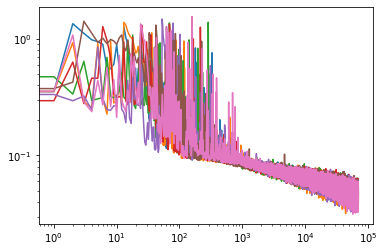

In [20]:
plt.loglog(losses.transpose())
plt.xlabel("Batch")
plt.ylabel("Loss")

In [21]:
train_acc

array([[0.77234],
       [0.75322],
       [0.75756],
       [0.7531 ],
       [0.75936],
       [0.75968],
       [0.77794]])

In [22]:
test_acc

array([[0.7132],
       [0.6975],
       [0.7016],
       [0.7005],
       [0.7004],
       [0.7061],
       [0.7232]])